In [77]:
from common import pd, plt, np, file_path

In [90]:
print(df.columns)
print(df.index)

MultiIndex([('Ausbildungsbereich / Jahr',                   'Beruf'),
            ('Ausbildungsbereich / Jahr',                    'Jahr'),
            (                'Insgesamt',   'Prüfungs-\nteilnahmen'),
            (                'Insgesamt',   'Bestandene\nPrüfungen'),
            (                'Insgesamt', 'Prüfungs-\nteilnahmen.1'),
            (                'Insgesamt', 'Bestandene\nPrüfungen.1'),
            (                'Insgesamt', 'Prüfungs-\nteilnahmen.2'),
            (                'Insgesamt', 'Bestandene\nPrüfungen.2'),
            (                   'Frauen',   'Prüfungs-\nteilnahmen'),
            (                   'Frauen',   'Bestandene\nPrüfungen'),
            (                   'Frauen', 'Prüfungs-\nteilnahmen.1'),
            (                   'Frauen', 'Bestandene\nPrüfungen.1'),
            (                   'Frauen', 'Prüfungs-\nteilnahmen.2'),
            (                   'Frauen', 'Bestandene\nPrüfungen.2'),
            (       

### 21211-04: Abschlussprüfungen, Geschlecht, Nationalität, Prüfungserfolg, Ausbildungsbereiche - Zeitreihe

In [78]:
sheet_name =  '21211-04'
df = pd.read_excel(file_path, sheet_name=sheet_name, header=[3, 5])
df = df.rename(columns={'Unnamed: 0_level_1': 'Beruf', 'Unnamed: 1_level_1': 'Jahr'})
df[('Ausbildungsbereich / Jahr', 'Beruf')] = df[('Ausbildungsbereich / Jahr', 'Beruf')].fillna(method='ffill')
groups = df.groupby(('Ausbildungsbereich / Jahr', 'Beruf'))

C:\Users\Chenweiduo\AppData\Local\Temp\ipykernel_9344\3490979323.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[('Ausbildungsbereich / Jahr', 'Beruf')] = df[('Ausbildungsbereich / Jahr', 'Beruf')].fillna(method='ffill')


#### 1. Pass numbers of Training Exams Over Time for All
所有人培训考试通过人数的时间变化


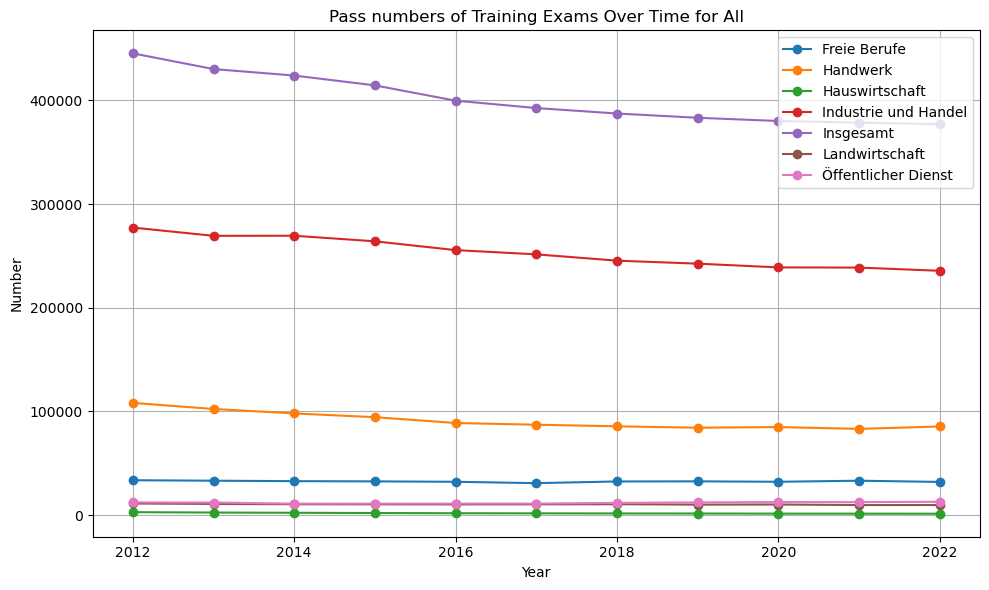

In [84]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt', 'Bestandene\nPrüfungen')], marker='o', label=group_name)

plt.title('Pass numbers of Training Exams Over Time for All')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1.1 Pass rates of Training Exams Over Time for All
所有人培训考试通过人数的时间变化

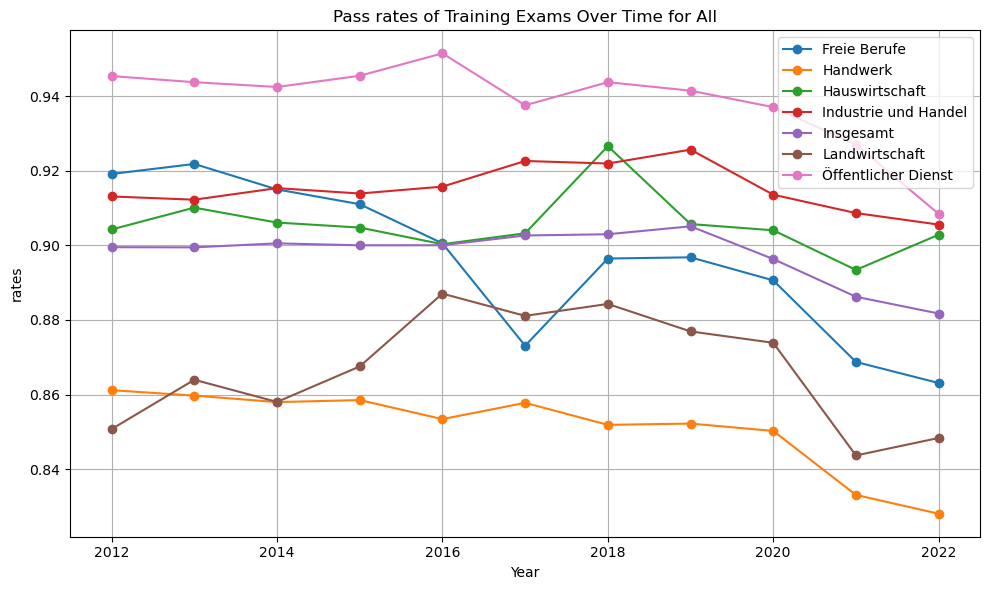

In [101]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt', 'Bestandene\nPrüfungen')] / group_data[('Insgesamt', 'Prüfungs-\nteilnahmen')] , marker='o', label=group_name)

plt.title('Pass rates of Training Exams Over Time for All')
plt.xlabel('Year')
plt.ylabel('rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Ratio of Germans in All Pass Rates of Training Exams
所有培训考试通过率中德国人的比例

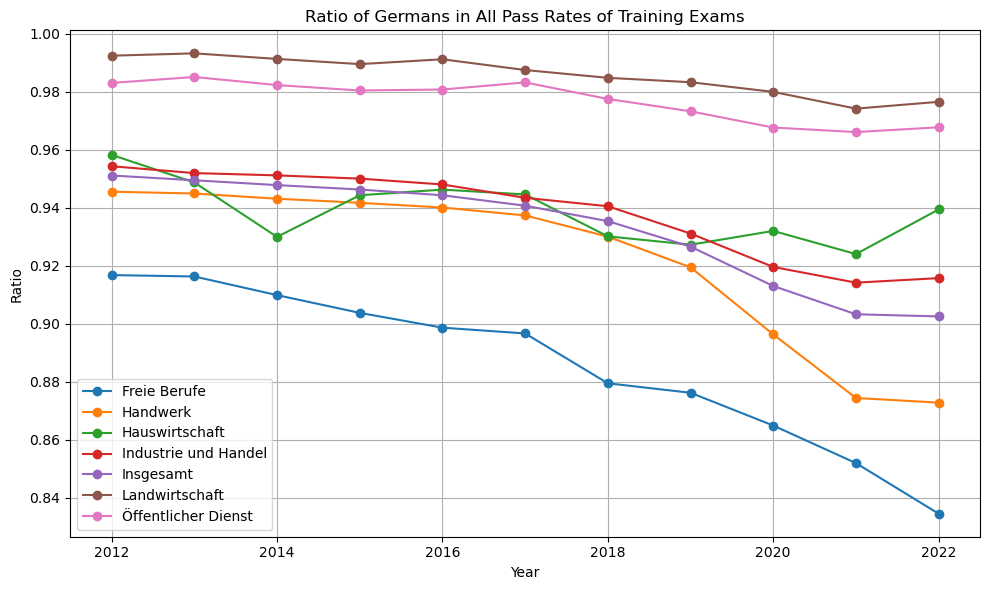

In [85]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt','Bestandene\nPrüfungen.1')] / group_data[('Insgesamt','Bestandene\nPrüfungen')], marker='o', label=group_name)
    
plt.title('Ratio of Germans in All Pass Rates of Training Exams')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. 1 The pass rates of Germans in exams over time
德国人通过考试的比率变化

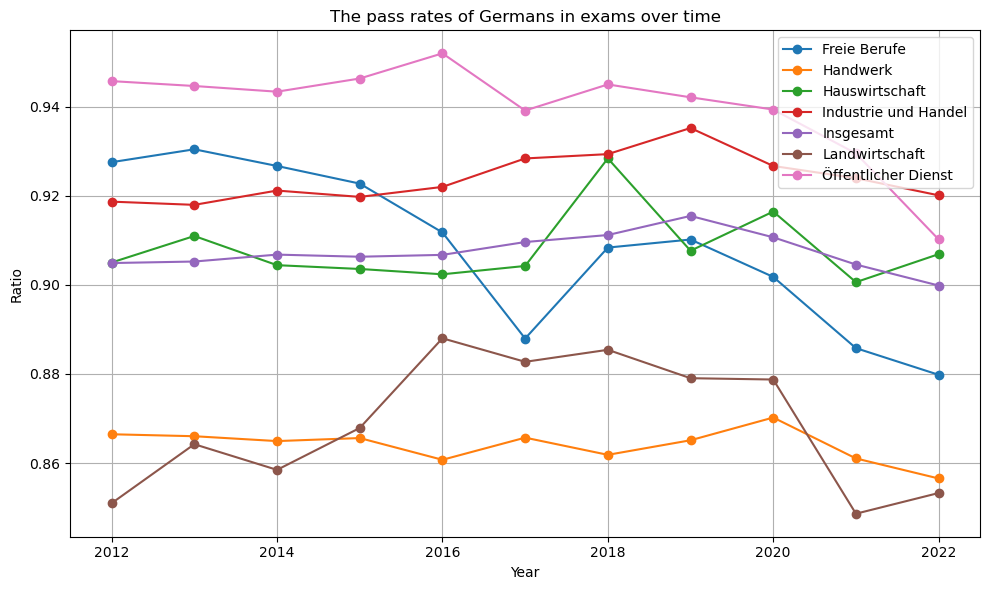

In [102]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt','Bestandene\nPrüfungen.1')] / group_data[('Insgesamt','Prüfungs-\nteilnahmen.1')], marker='o', label=group_name)
    
plt.title('The pass rates of Germans in exams over time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Ratio of Foreigners in All Pass Rates of Training Exams
所有培训考试通过率中外国人的比例

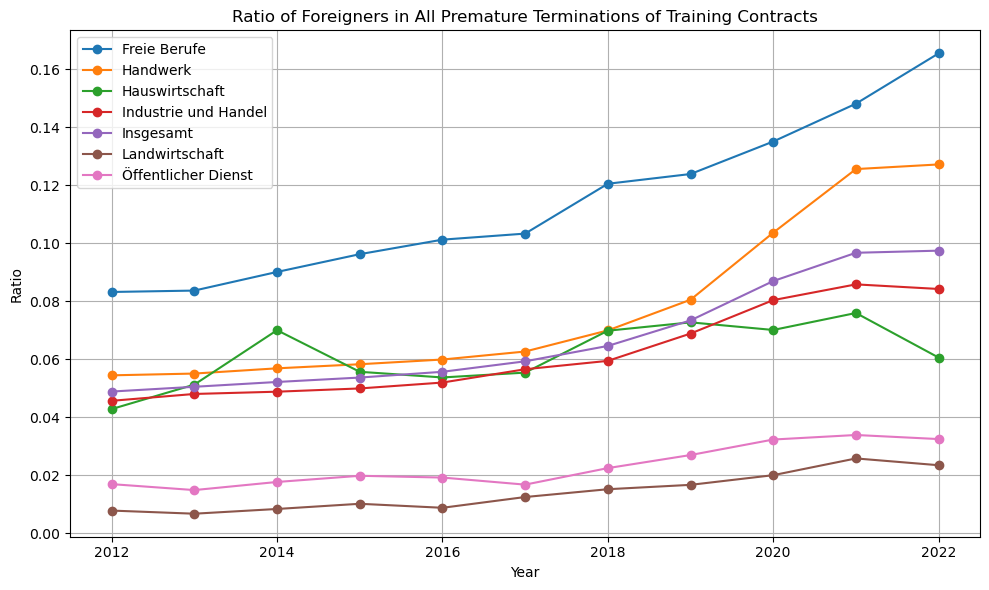

In [87]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt','Bestandene\nPrüfungen.2')] / group_data[('Insgesamt','Bestandene\nPrüfungen')], marker='o', label=group_name)
    
plt.title('Ratio of Foreigners in All Premature Terminations of Training Contracts')
plt.xlabel('Year')
plt.ylabel('Ratio')c
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. 1 The pass rates of Foreigners in exams over time
外国人通过考试的比率变化

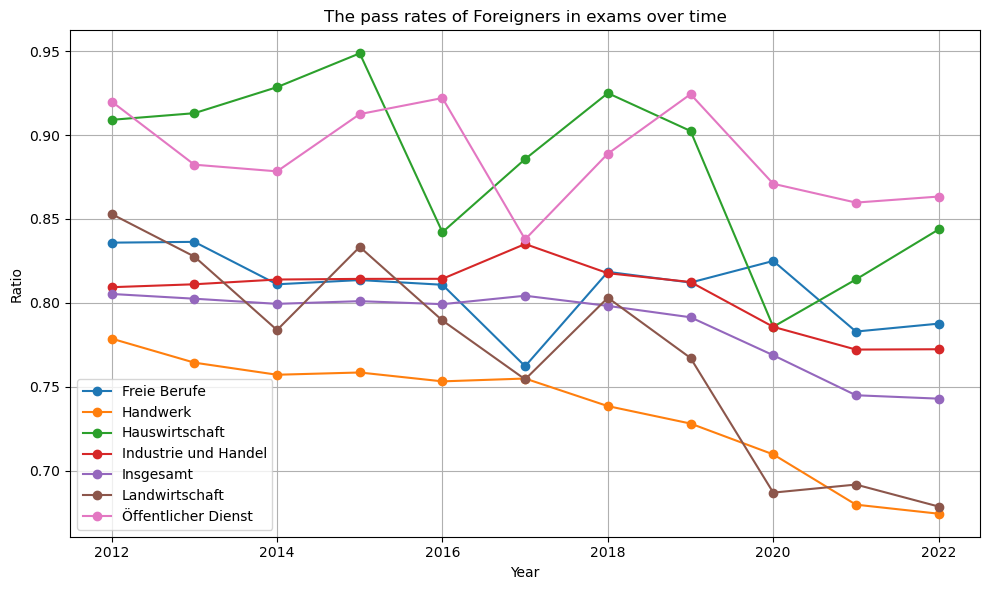

In [103]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt','Bestandene\nPrüfungen.2')] / group_data[('Insgesamt','Prüfungs-\nteilnahmen.2')], marker='o', label=group_name)
    
plt.title('The pass rates of Foreigners in exams over time')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4. Number of Germans and Foreigners in Pass Rates of Training Exams
培训考试通过率中德国人和外国人的数量

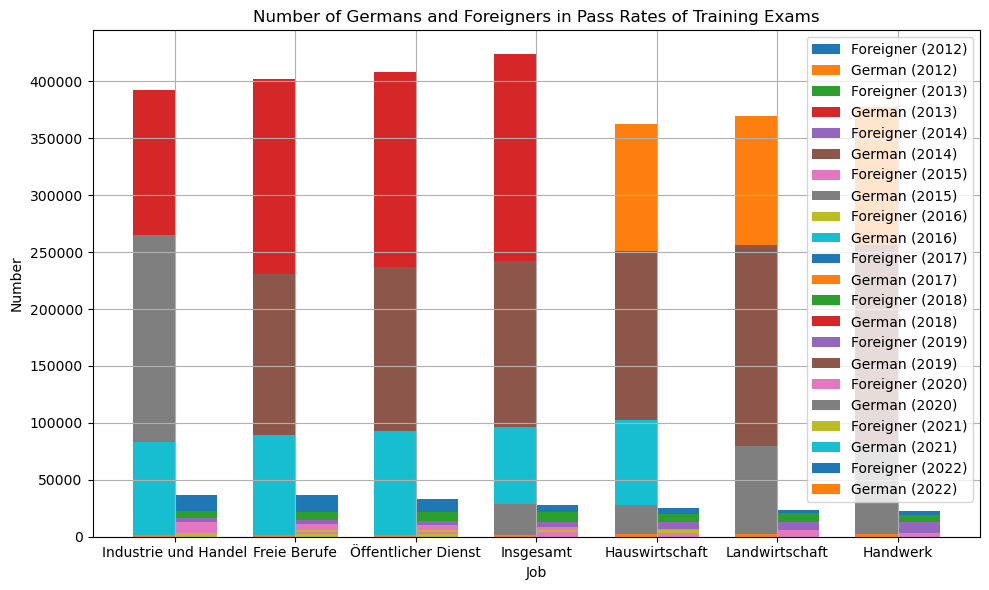

In [88]:
fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = np.arange(7)

years = range(2012, 2023)
foreigner = df[('Insgesamt','Bestandene\nPrüfungen.2')]
german = df[('Insgesamt','Bestandene\nPrüfungen.1')]
group = set(df[('Ausbildungsbereich / Jahr', 'Beruf')])

foreigner_value = []
german_value = []
for i in range(0, len(foreigner), 7):
    foreigner_value.append(foreigner[i:i+7])
    german_value.append(german[i:i+7])

for i, year in enumerate(years):
    ax.bar(index+bar_width, foreigner_value[i], bar_width, label=f'Foreigner ({year})')
    ax.bar(index, german_value[i], bar_width, label=f'German ({year})')

ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(group)

ax.set_xlabel('Job')
ax.set_ylabel('Number')
ax.set_title('Number of Germans and Foreigners in Pass Rates of Training Exams')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 5. Ratio of Foreigners/Germans in Pass Rates of Training Exams
培训考试通过率中外国人/德国人的比例

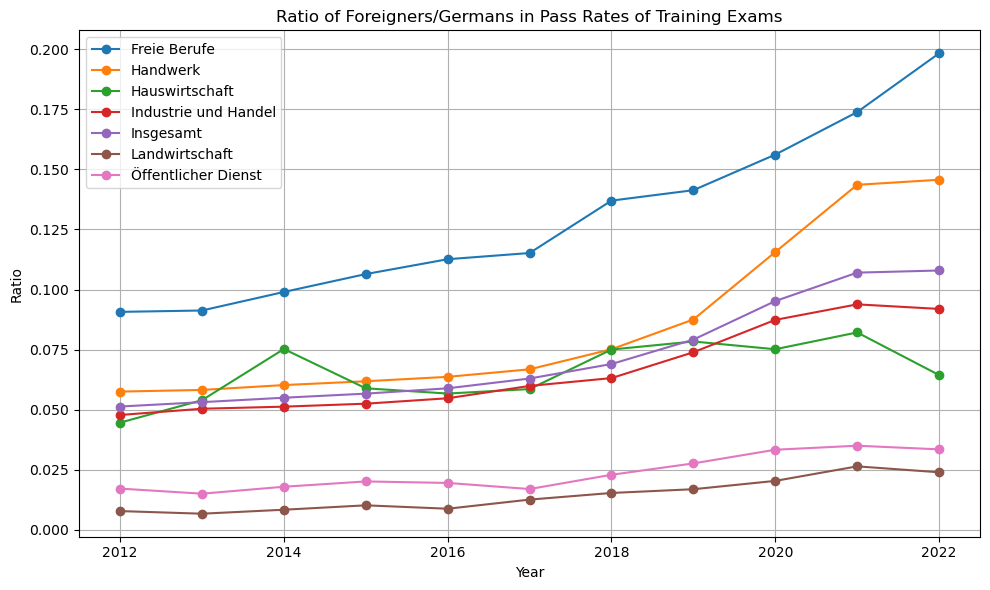

In [91]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Insgesamt','Bestandene\nPrüfungen.2')] / group_data[('Insgesamt','Bestandene\nPrüfungen.1')], marker='o', label=group_name)
    
plt.title('Ratio of Foreigners/Germans in Pass Rates of Training Exams')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 6. Pass number of Training Exams Over Time for Foreigner Women
外籍女性培训考试通过的时间变化

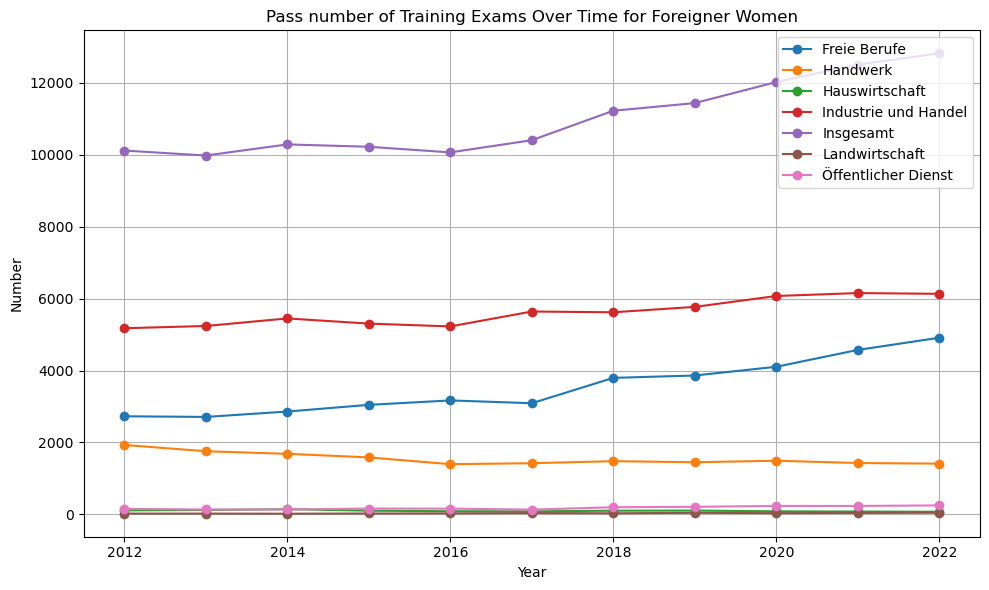

In [95]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Frauen','Bestandene\nPrüfungen.2')], marker='o', label=group_name)
    
plt.title('Pass number of Training Exams Over Time for Foreigner Women')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 7. Pass number of Training Exams Over Time for German Women
德国女性培训考试通过的时间变化

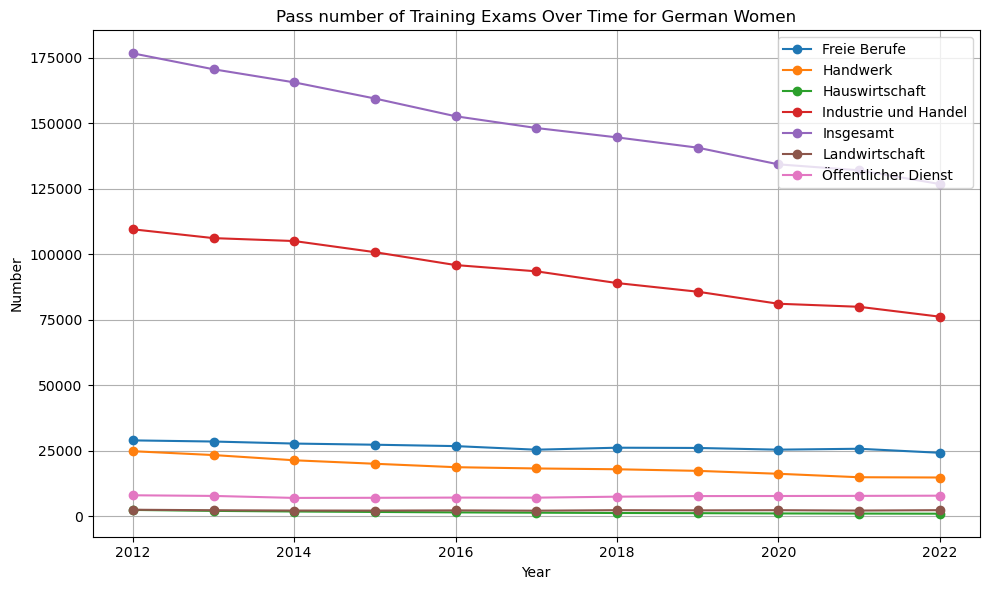

In [94]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Frauen','Bestandene\nPrüfungen.1')], marker='o', label=group_name)
    
plt.title('Pass number of Training Exams Over Time for German Women')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 8. Ratio of Foreigners/Germans Women in Pass Rates of Training Exams
培训考试通过率中外籍女性/德国女性的比例

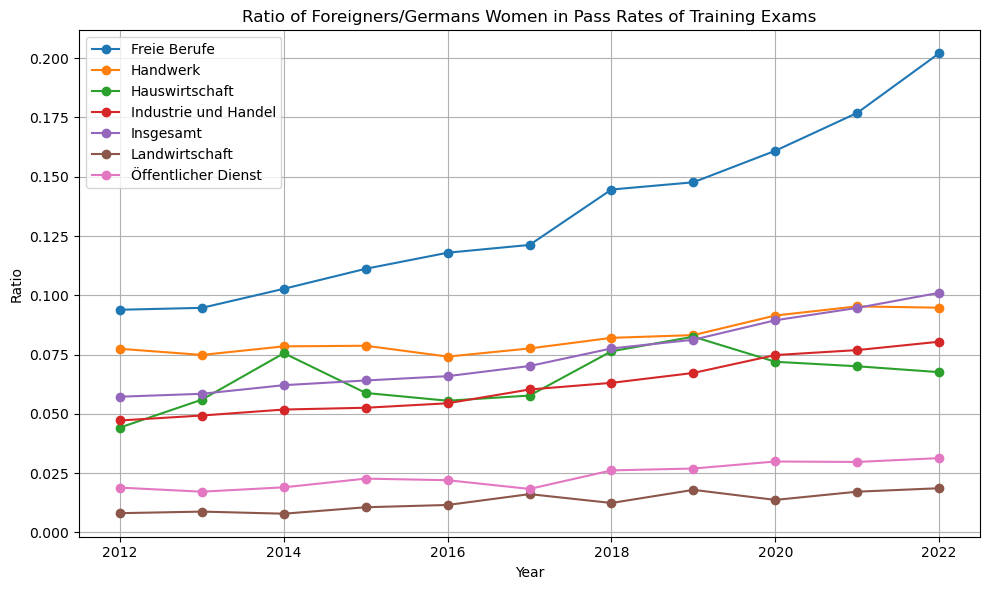

In [96]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Frauen','Bestandene\nPrüfungen.2')] / group_data[('Frauen','Bestandene\nPrüfungen.1')], marker='o', label=group_name)
    
plt.title('Ratio of Foreigners/Germans Women in Pass Rates of Training Exams')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 9. Pass number of Training Exams Over Time for Foreigner Men
外籍男性培训考试通过的时间变化

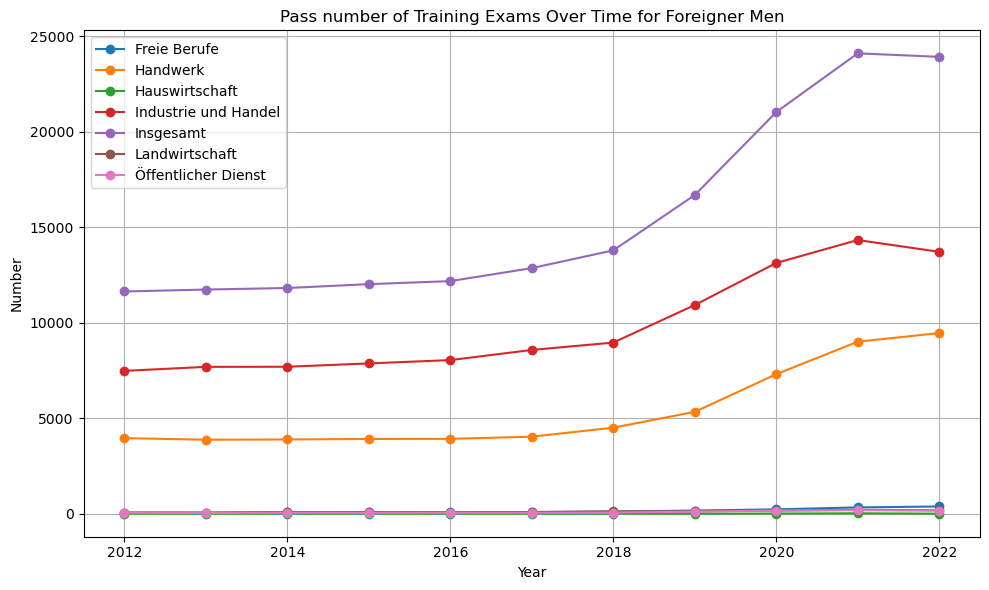

In [97]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Männer','Bestandene\nPrüfungen.2')], marker='o', label=group_name)
    
plt.title('Pass number of Training Exams Over Time for Foreigner Men')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 10. Pass number of Training Exams Over Time for German Men
德国男性培训考试通过的时间变化

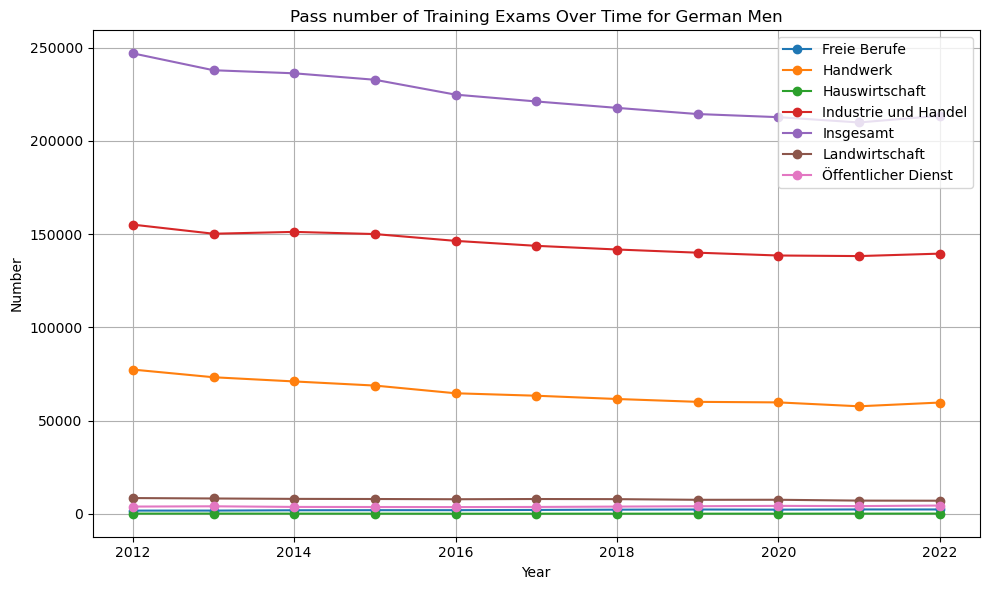

In [98]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Männer','Bestandene\nPrüfungen.1')], marker='o', label=group_name)
    
plt.title('Pass number of Training Exams Over Time for German Men')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 11. Ratio of Foreigners/Germans Men in Pass Rates of Training Exams
培训考试通过率中外籍男性/德国男性的比例

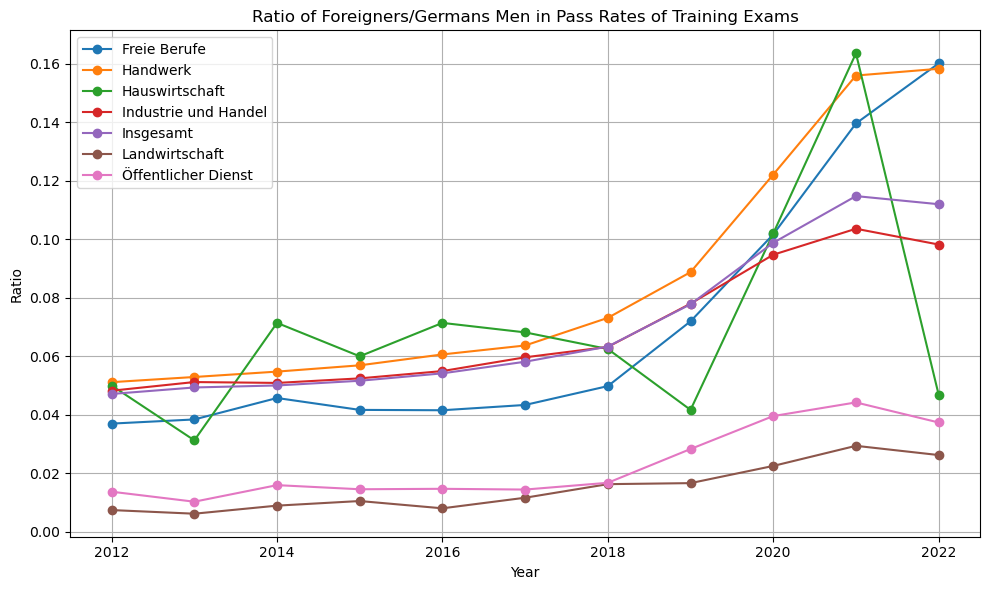

In [99]:
plt.figure(figsize=(10, 6))

for group_name, group_data in groups:
    plt.plot(group_data[('Ausbildungsbereich / Jahr','Jahr')], group_data[('Männer','Bestandene\nPrüfungen.2')] / group_data[('Männer','Bestandene\nPrüfungen.1')], marker='o', label=group_name)
    
plt.title('Ratio of Foreigners/Germans Men in Pass Rates of Training Exams')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()